In [ ]:
# ignore warnings
import pandas as pd,matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# load dataset
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

In [ ]:
df=pd.read_csv('/content/data.csv')

In [ ]:
df

,Month,Passengers
0,2010-01,112
1,2010-02,118
2,2010-03,132
3,2010-04,129
4,2010-05,121
...,...,...
139,2021-08,606
140,2021-09,508
141,2021-10,461
142,2021-11,390


In [ ]:
df.columns

Index(['Month', 'Passengers'], dtype='object')

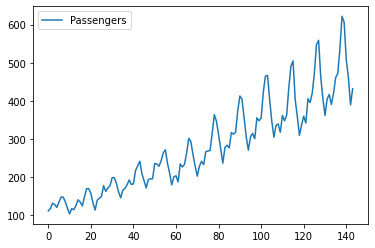

In [ ]:
df = df[['Month','Passengers']]
df.plot()

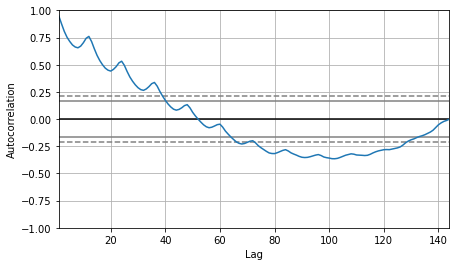

         Passengers
Month              
2010-01         112
2010-02         118
2010-03         132
2010-04         129
2010-05         121


In [ ]:
df = df.set_index('Month')
fig = plt.figure(figsize = (7,4))
autocorrelation_plot(df)
plt.show()

print(df.head(5))

#Checking Stationarity Using Dickey-Fuller test 

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))



ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


# Finding the value of the d parameter 

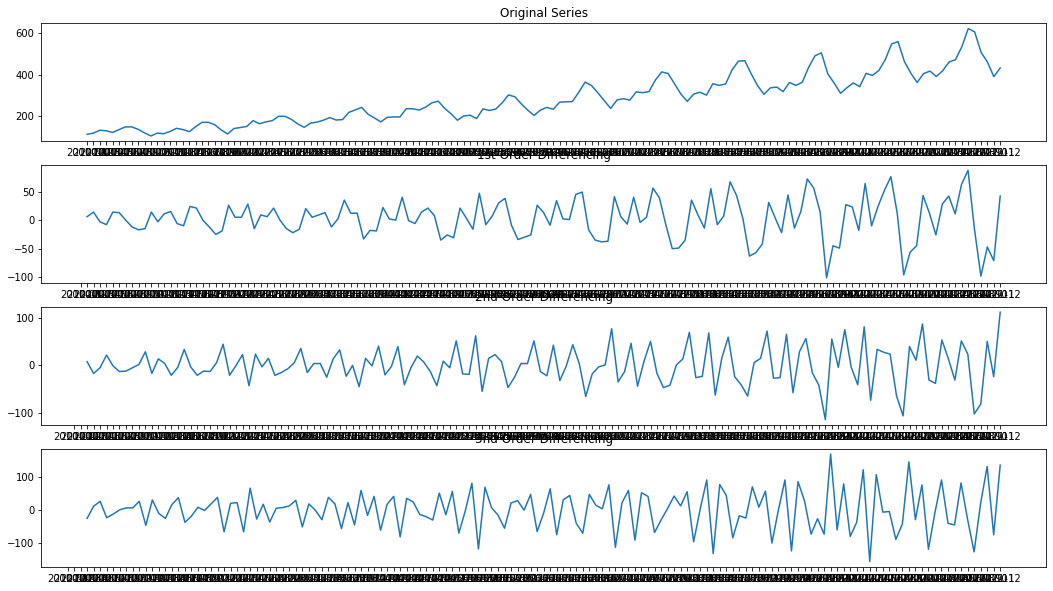

In [ ]:
plt.rcParams.update({'figure.figsize':(18,10)})

# Original Series
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
ax1.plot(df.Passengers); ax1.set_title('Original Series')

# 1st Differencing
ax2.plot(df.Passengers.diff()); ax2.set_title('1st Order Differencing')

# 2nd Differencing
ax3.plot(df.Passengers.diff().diff()); ax3.set_title('2nd Order Differencing')

# 3nd Differencing
ax4.plot(df.Passengers.diff().diff().diff()); ax4.set_title('3nd Order Differencing')
plt.show()



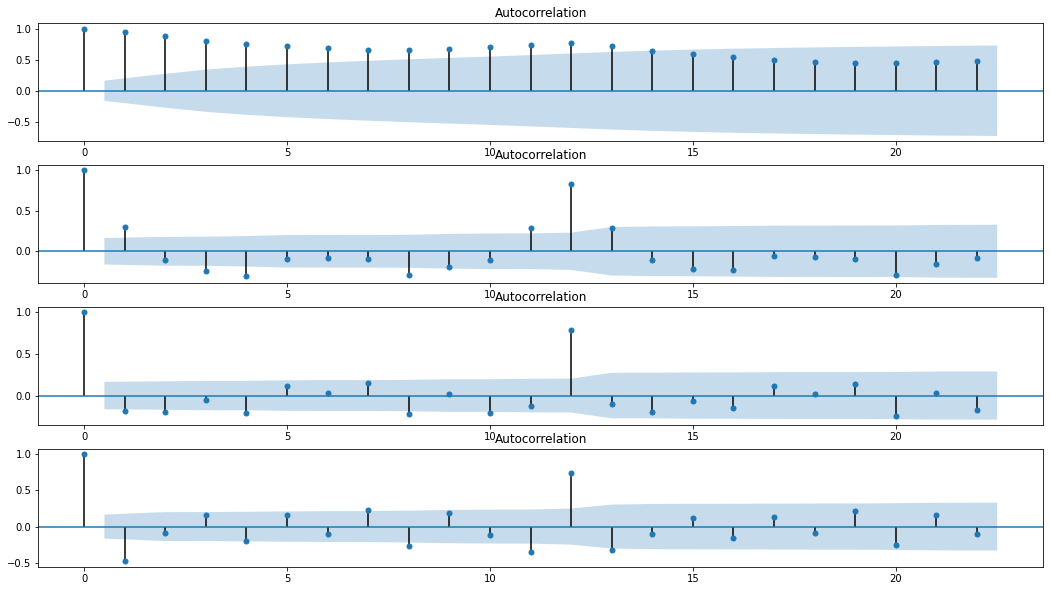

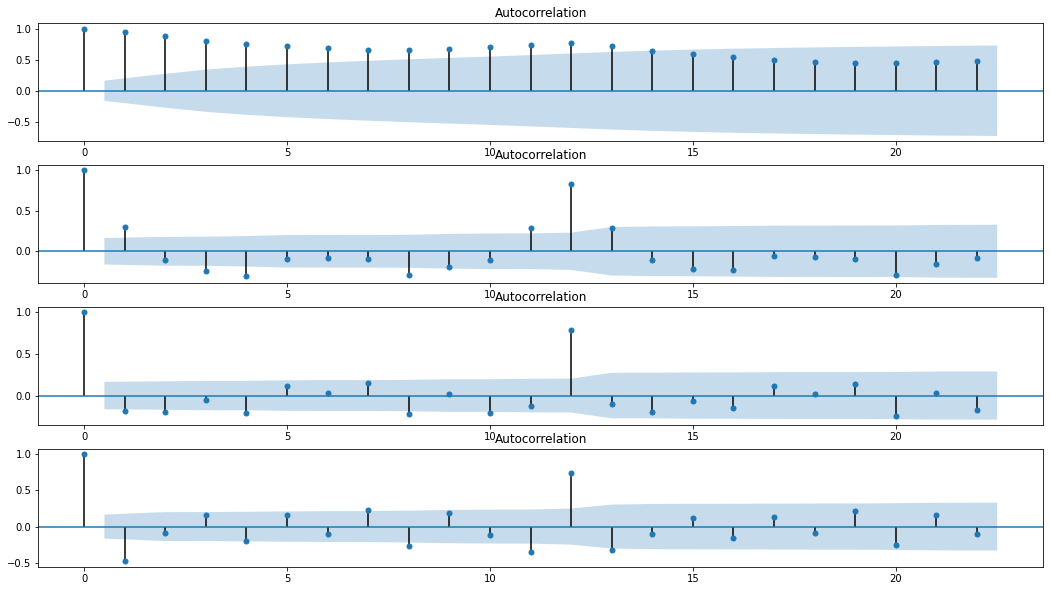

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
plot_acf(df.Passengers, ax=ax1)
plot_acf(df.Passengers.diff().dropna(), ax=ax2)
plot_acf(df.Passengers.diff().diff().dropna(), ax=ax3)
plot_acf(df.Passengers.diff().diff().diff().dropna(), ax=ax4)



# Finding the value of the p parameter

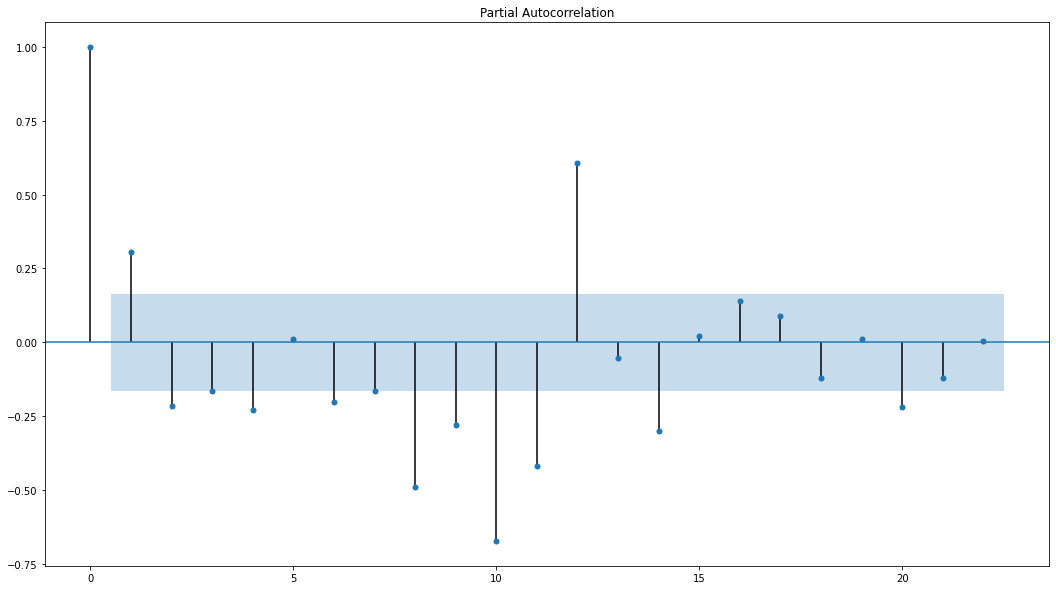

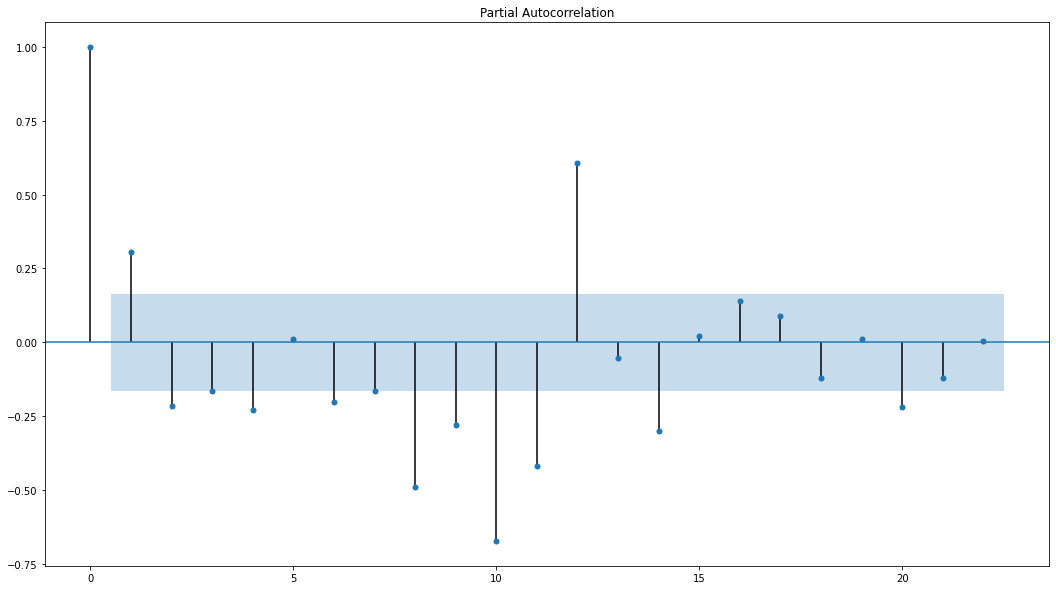

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df.Passengers.diff().dropna())

# Finding the value of the q parameter

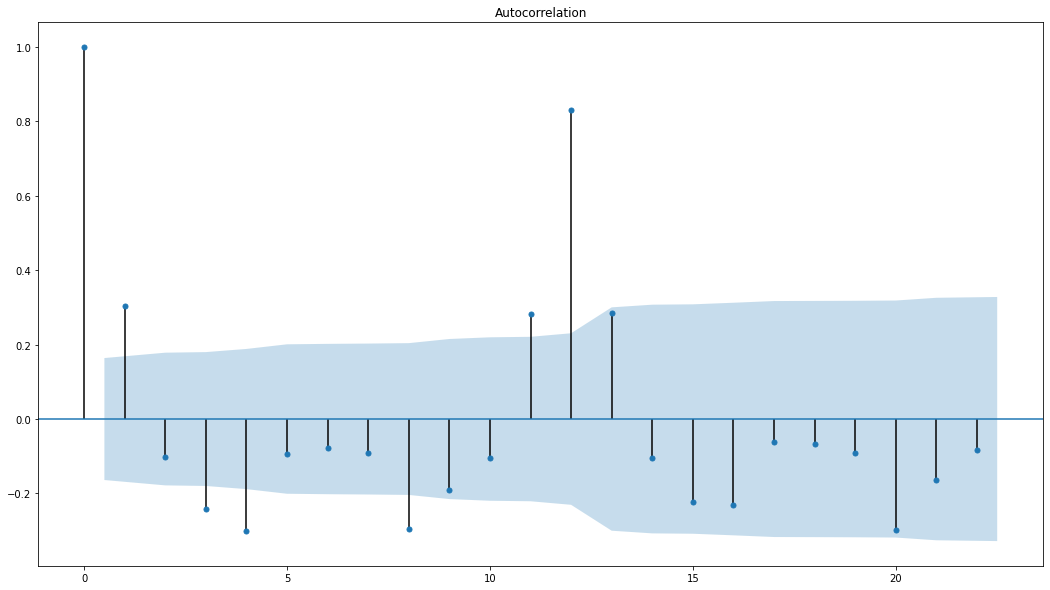

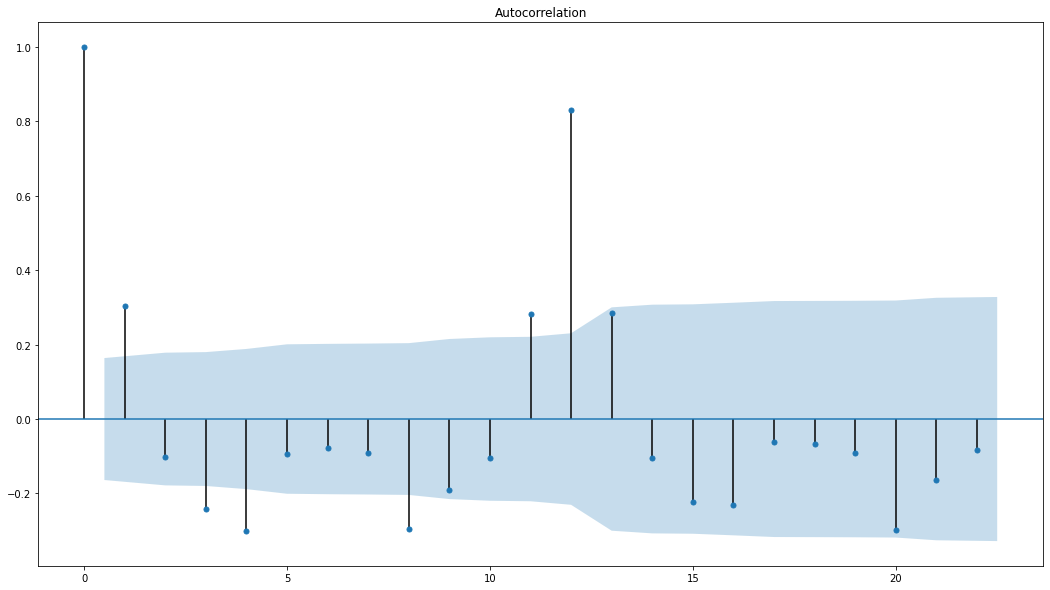

In [ ]:
plot_acf(df.Passengers.diff().dropna())

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.Passengers, order = (0,1,1))
model_fit = model.fit(disp=-1)
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -696.414
Method:                       css-mle   S.D. of innovations             31.515
Date:                Thu, 15 Sep 2022   AIC                           1398.827
Time:                        13:12:10   BIC                           1407.716
Sample:                    02-01-2010   HQIC                          1402.439
                         - 12-01-2021                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.4212      3.686      0.657      0.511      -4.803       9.645
ma.L1.D.Passengers     0.4012      0.089      4.493      0.000       0.226       0.576
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -2.4926           +0.0000j            2.4926            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 8.2 MB/s 
     |████████████████████████████████| 9.8 MB 23.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=3, 
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

ImportError: ignored